<a href="https://colab.research.google.com/github/OJO44/24bMachineLearning1/blob/main/CreditRiskModellingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the necessary libraries


In [185]:
# General Libraries

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

# Load Data


In [186]:
#Loading data
Loan = pd.read_csv("/content/raw-data (1).csv")
Loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


# Basic EDA and Data Cleaning


In [187]:
Loan.drop(columns=[
    "V23",
    "V24",
    "V26",
    "V27"
])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V25,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,1,0,NaN,0,46500.0,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,1,0,NaN,0,28168.0,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,6,3,55000.0,0,38900.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,1,0,NaN,0,42900.0,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,1,0,NaN,0,40900.0,0,0,0,TIER 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119523,119524,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,0,NaN,0,0,0,TIER 3,0
119524,119525,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,NaN,0,33000.0,3,1,0,TIER 3,1
119525,119526,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,0,NaN,0,0,0,TIER 3,0
119526,119527,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,31990.0,0,43600.0,0,0,0,TIER 1,0


In [188]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,V23,V24,Maximum amount sanctioned for any Two wheeler loan,V26,V27,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


In [189]:
# Drop unnecessary columns
Loan_renamed = Loan_renamed.drop(columns=["V23", "V24", "V26", "V27"])

# Check the DataFrame info
Loan_renamed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [190]:
Loan_renamed.shape

(119528, 28)

In [191]:
#change column names to lower
Loan_renamed.columns=map(str.lower,Loan_renamed.columns)
Loan_renamed.head()

,customer id,customer has bounced in first emi,no of times bounced 12 months,maximum mob,no of times bounced while repaying the loan,emi,loan amount,tenure,dealer codes from where customer has purchased the two wheeler,product code of two wheeler,...,no of secured loans,no of unsecured loans,max amount sanctioned in the live loans,no of new loans in last 3 months,maximum amount sanctioned for any two wheeler loan,no of times 30 days past due in last 6 months,no of times 60 days past due in last 6 months,no of times 90 days past due in last 3 months,tier,target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,1,0,NaN,0,46500.0,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,1,0,NaN,0,28168.0,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,6,3,55000.0,0,38900.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,1,0,NaN,0,42900.0,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,1,0,NaN,0,40900.0,0,0,0,TIER 1,0


In [192]:
Loan_renamed.isna().sum()

customer id                                                           0
customer has bounced in first emi                                     0
no of times bounced 12 months                                         0
maximum mob                                                       34480
no of times bounced while repaying the loan                       34480
emi                                                               34480
loan amount                                                       34480
tenure                                                            34480
dealer codes from where customer has purchased the two wheeler    34480
product code of two wheeler                                       34480
no of advance emi paid                                            34480
rate of interest                                                  34480
gender                                                            34480
employment type                                                 

In [193]:
total_missing=Loan_renamed.isnull().sum().sort_values(ascending=False)
percent=Loan_renamed.isnull().sum().sort_values(ascending=False)/Loan_renamed.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable
missing_df=missing_df[total_missing>0] # only retain those with missing values
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage
missing_df

,total_missing,percentage_missing
variable,,
max amount sanctioned in the live loans,82902,69.357807
resident type of customer,35397,29.613982
rate of interest,34480,28.846797
product code of two wheeler,34480,28.846797
customer age when loanwas taken,34480,28.846797
date of birth,34480,28.846797
employment type,34480,28.846797
gender,34480,28.846797
maximum mob,34480,28.846797


In [194]:
#Convertdate of birth to the right data type
Loan_renamed['date of birth'] = pd.to_datetime(Loan_renamed['date of birth'])
Loan_renamed.head(2)

,customer id,customer has bounced in first emi,no of times bounced 12 months,maximum mob,no of times bounced while repaying the loan,emi,loan amount,tenure,dealer codes from where customer has purchased the two wheeler,product code of two wheeler,...,no of secured loans,no of unsecured loans,max amount sanctioned in the live loans,no of new loans in last 3 months,maximum amount sanctioned for any two wheeler loan,no of times 30 days past due in last 6 months,no of times 60 days past due in last 6 months,no of times 90 days past due in last 3 months,tier,target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,1,0,NaN,0,46500.0,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,1,0,NaN,0,28168.0,0,0,0,TIER 1,0


In [195]:
#Explore all the categorical variables
## get their names first
categorical_features = Loan_renamed.select_dtypes(include=['object'])
print(categorical_features.head())

  product code of two wheeler  gender employment type  \
0                          SC  FEMALE       HOUSEWIFE   
1                          MO    MALE            SELF   
2                          SC    MALE            SELF   
3                          SC  FEMALE             SAL   
4                          MC    MALE             SAL   

  resident type of customer    tier  
0                     OWNED  TIER 1  
1                      RENT  TIER 1  
2                      RENT  TIER 1  
3                      RENT  TIER 1  
4                      RENT  TIER 1  


<Figure size 2000x2000 with 0 Axes>

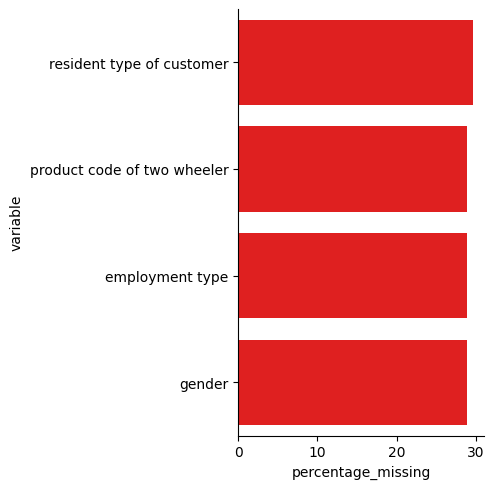

In [196]:
#Plot missingness in categorical variables
## plot the missingness in the categorical variabele
missing_vars=[x for x in missing_df.index if x in categorical_features.columns]
missing_df_resetted=missing_df.reset_index()
missing_df_cat=missing_df_resetted[missing_df_resetted['variable'].isin(categorical_features.columns)]
## plot now
plt.figure(figsize=(20,20))
ax=sns.catplot(y='variable',x='percentage_missing',data=missing_df_cat,kind='bar',color='red')

In [197]:
#Exploring numerical variables
# Exploring numerical variables
#print(Loan_renamed.dtypes)  # Print the data types of all columns

# Select the numerical columns
numerical = Loan_renamed.select_dtypes(include=[int, float])
print(numerical.columns)  # Print the names of the numerical columns

Index(['customer id', 'customer has bounced in first emi',
       'no of times bounced 12 months', 'maximum mob',
       'no of times bounced while repaying the loan', 'emi', 'loan amount',
       'tenure',
       'dealer codes from where customer has purchased the two wheeler',
       'no of advance emi paid', 'rate of interest',
       'customer age when loanwas taken', 'no of loans', 'no of secured loans',
       'no of unsecured loans', 'max amount sanctioned in the live loans',
       'no of new loans in last 3 months',
       'maximum amount sanctioned for any two wheeler loan',
       'no of times 30 days past due in last 6 months',
       'no of times 60 days past due in last 6 months',
       'no of times 90 days past due in last 3 months', 'target variable'],
      dtype='object')


In [198]:
numerical.head(4)

,customer id,customer has bounced in first emi,no of times bounced 12 months,maximum mob,no of times bounced while repaying the loan,emi,loan amount,tenure,dealer codes from where customer has purchased the two wheeler,no of advance emi paid,...,no of loans,no of secured loans,no of unsecured loans,max amount sanctioned in the live loans,no of new loans in last 3 months,maximum amount sanctioned for any two wheeler loan,no of times 30 days past due in last 6 months,no of times 60 days past due in last 6 months,no of times 90 days past due in last 3 months,target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,0.0,...,1,1,0,NaN,0,46500.0,0,0,0,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,0.0,...,1,1,0,NaN,0,28168.0,0,0,0,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,0.0,...,9,6,3,55000.0,0,38900.0,31,31,16,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,2.0,...,1,1,0,NaN,0,42900.0,0,0,0,0


# Cleaning Data

# Handling Missingness

In [199]:
#Handling Missingne ss
categorical_features.fillna('None')

,product code of two wheeler,gender,employment type,resident type of customer,tier
0,SC,FEMALE,HOUSEWIFE,OWNED,TIER 1
1,MO,MALE,SELF,RENT,TIER 1
2,SC,MALE,SELF,RENT,TIER 1
3,SC,FEMALE,SAL,RENT,TIER 1
4,MC,MALE,SAL,RENT,TIER 1
...,...,...,...,...,...
119523,None,None,None,None,TIER 3
119524,None,None,None,None,TIER 3
119525,None,None,None,None,TIER 3
119526,None,None,None,None,TIER 1


In [200]:
categorical_features.head()

,product code of two wheeler,gender,employment type,resident type of customer,tier
0,SC,FEMALE,HOUSEWIFE,OWNED,TIER 1
1,MO,MALE,SELF,RENT,TIER 1
2,SC,MALE,SELF,RENT,TIER 1
3,SC,FEMALE,SAL,RENT,TIER 1
4,MC,MALE,SAL,RENT,TIER 1


In [201]:
categorical_features.isnull().sum()


product code of two wheeler    34480
gender                         34480
employment type                34480
resident type of customer      35397
tier                               0
dtype: int64

In [138]:
# Missing values treatment
#Loan_renamed.dropna(axis=0,how='any',subset=['loan amount','gender'],inplace=True)


In [202]:
#fill categorical missing values with mode
categorical_features= categorical_features.fillna("Other")

In [203]:
categorical_features.isnull().sum()

product code of two wheeler    0
gender                         0
employment type                0
resident type of customer      0
tier                           0
dtype: int64

In [204]:
categorical_features

,product code of two wheeler,gender,employment type,resident type of customer,tier
0,SC,FEMALE,HOUSEWIFE,OWNED,TIER 1
1,MO,MALE,SELF,RENT,TIER 1
2,SC,MALE,SELF,RENT,TIER 1
3,SC,FEMALE,SAL,RENT,TIER 1
4,MC,MALE,SAL,RENT,TIER 1
...,...,...,...,...,...
119523,Other,Other,Other,Other,TIER 3
119524,Other,Other,Other,Other,TIER 3
119525,Other,Other,Other,Other,TIER 3
119526,Other,Other,Other,Other,TIER 1


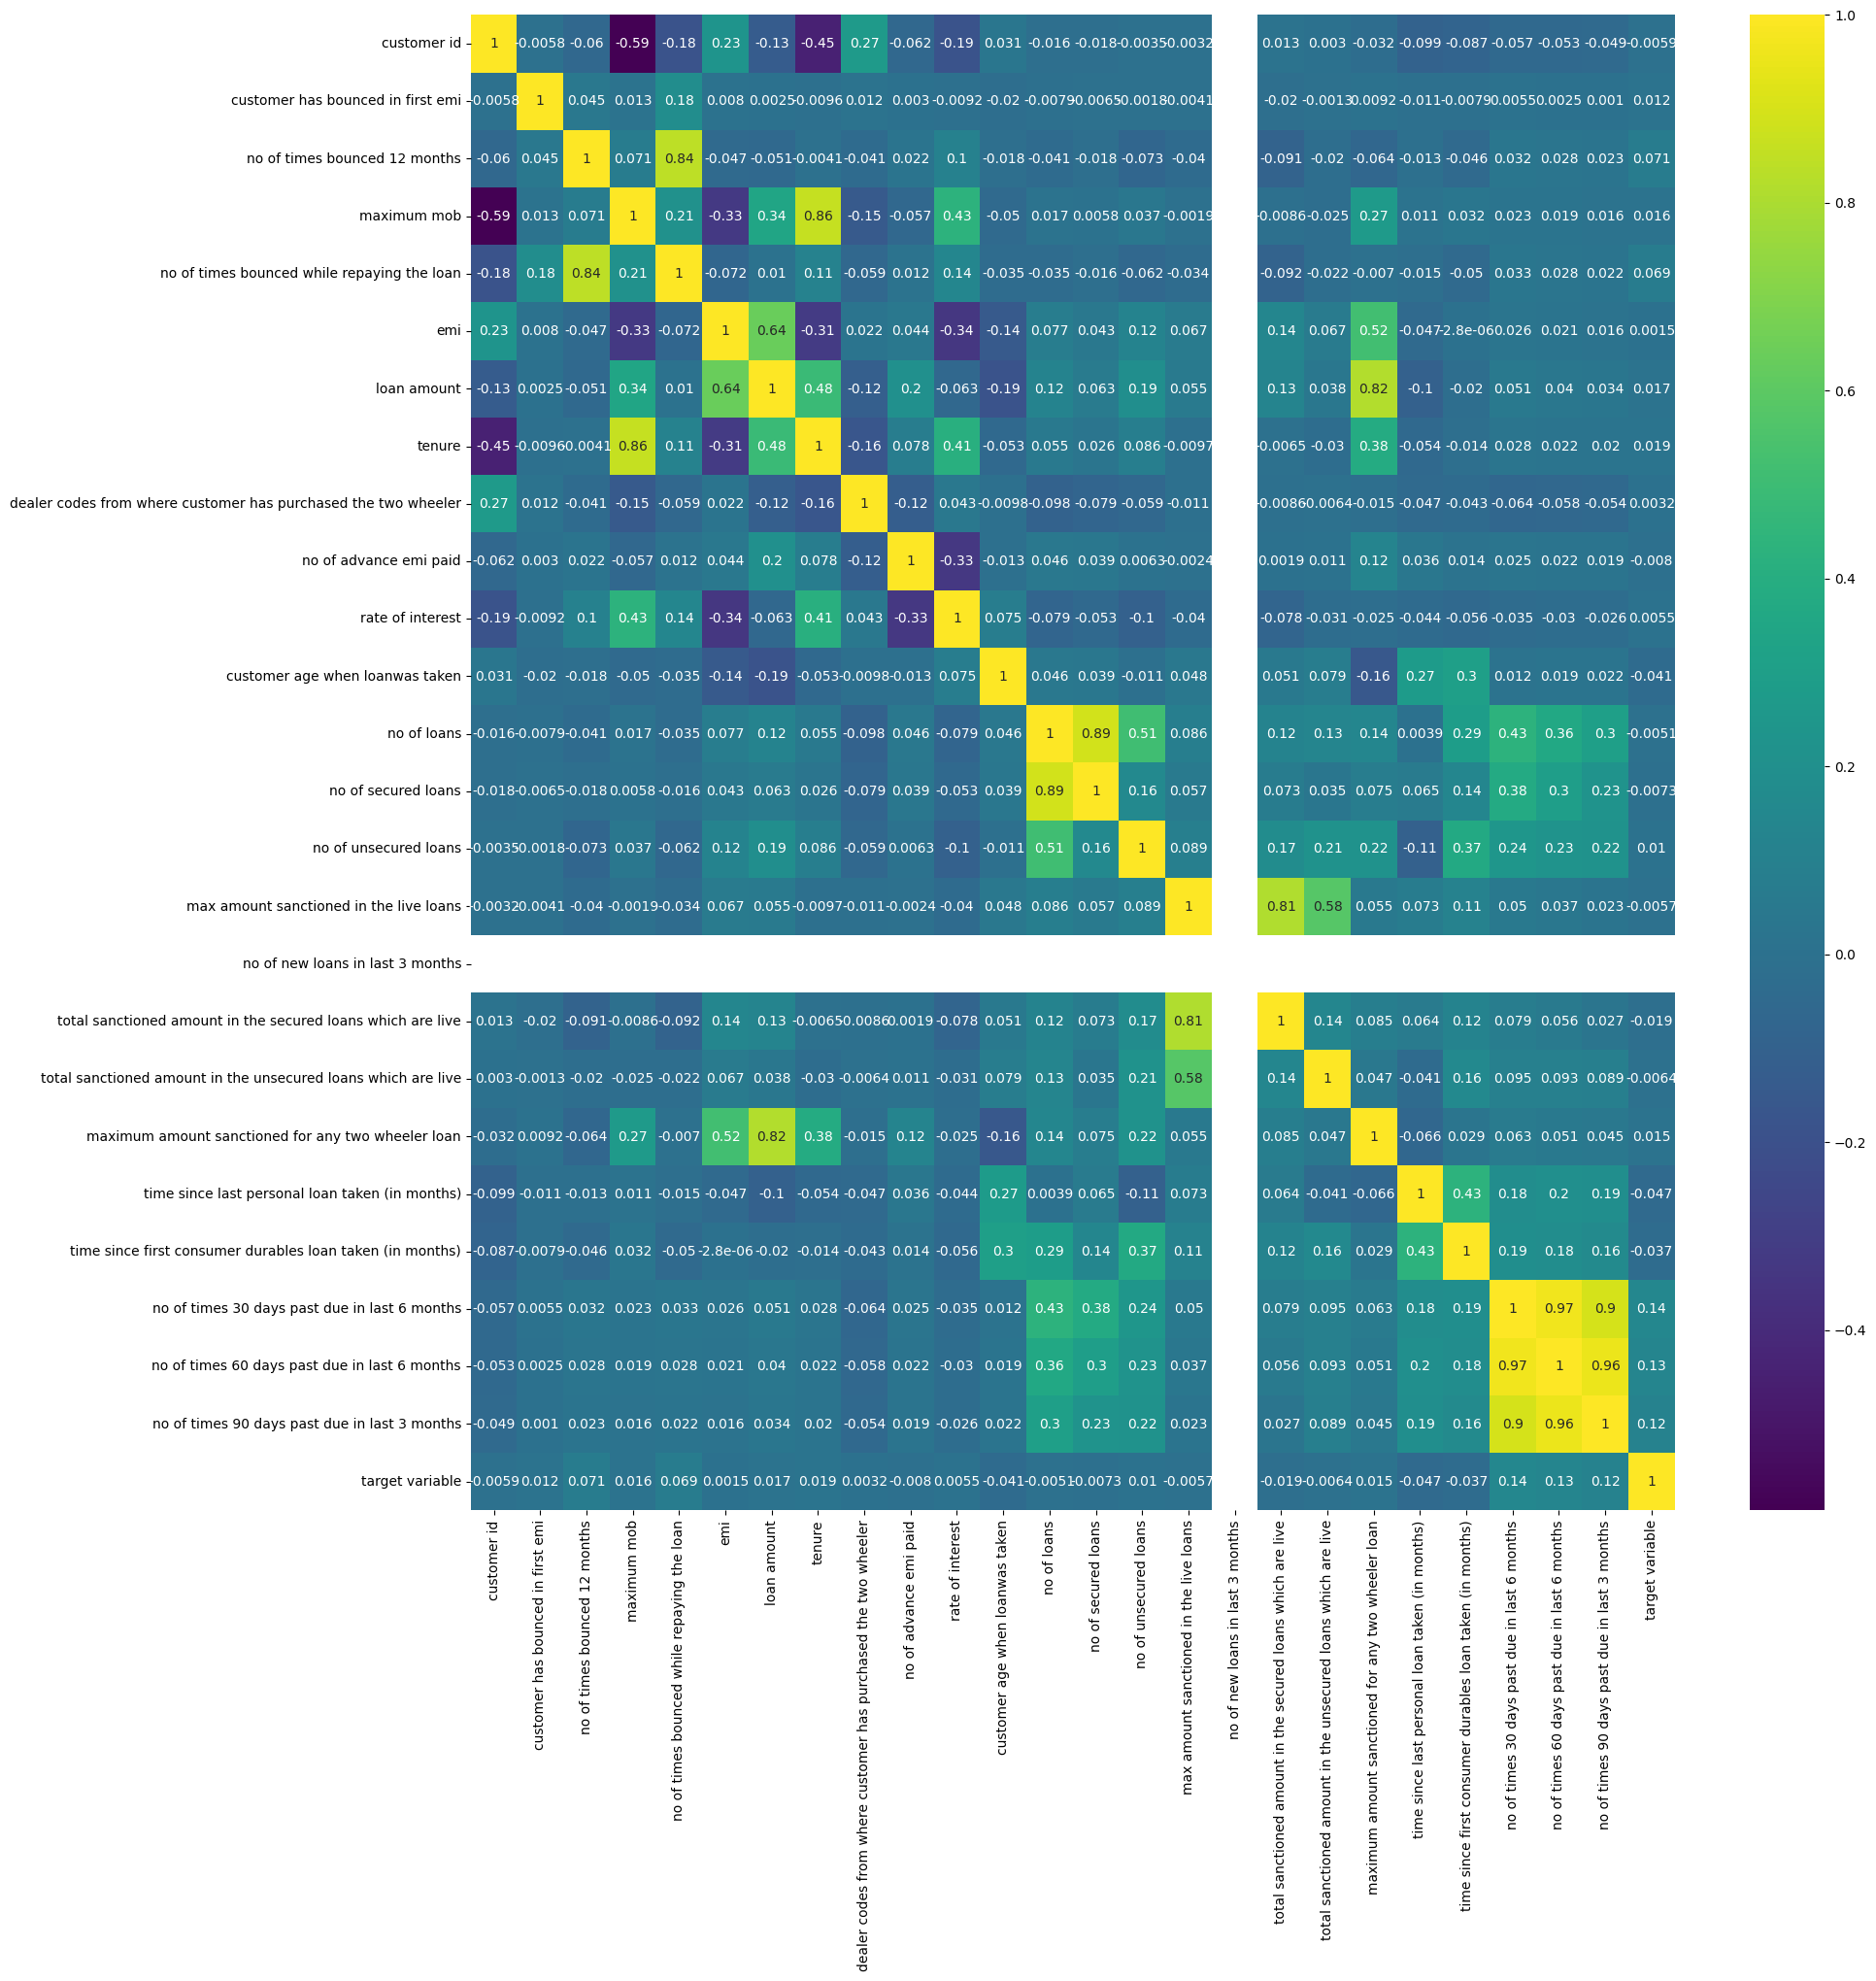

In [ ]:
#correlation matrix
corrmat = numerical.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(numerical[top_corr_features].corr(),annot=True,cmap="viridis")

In [205]:
numerical.isna().sum()

customer id                                                           0
customer has bounced in first emi                                     0
no of times bounced 12 months                                         0
maximum mob                                                       34480
no of times bounced while repaying the loan                       34480
emi                                                               34480
loan amount                                                       34480
tenure                                                            34480
dealer codes from where customer has purchased the two wheeler    34480
no of advance emi paid                                            34480
rate of interest                                                  34480
customer age when loanwas taken                                   34480
no of loans                                                           0
no of secured loans                                             

In [206]:
numerical

,customer id,customer has bounced in first emi,no of times bounced 12 months,maximum mob,no of times bounced while repaying the loan,emi,loan amount,tenure,dealer codes from where customer has purchased the two wheeler,no of advance emi paid,...,no of loans,no of secured loans,no of unsecured loans,max amount sanctioned in the live loans,no of new loans in last 3 months,maximum amount sanctioned for any two wheeler loan,no of times 30 days past due in last 6 months,no of times 60 days past due in last 6 months,no of times 90 days past due in last 3 months,target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,0.0,...,1,1,0,NaN,0,46500.0,0,0,0,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,0.0,...,1,1,0,NaN,0,28168.0,0,0,0,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,0.0,...,9,6,3,55000.0,0,38900.0,31,31,16,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,2.0,...,1,1,0,NaN,0,42900.0,0,0,0,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,0.0,...,1,1,0,NaN,0,40900.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119523,119524,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,NaN,0,0,0,0
119524,119525,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,NaN,0,33000.0,3,1,0,1
119525,119526,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,NaN,0,0,0,0
119526,119527,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,1,2,31990.0,0,43600.0,0,0,0,0


In [207]:

# Fill missing numerical values with the median
numerical = numerical.fillna(numerical.median())
numerical.isna().sum()


customer id                                                       0
customer has bounced in first emi                                 0
no of times bounced 12 months                                     0
maximum mob                                                       0
no of times bounced while repaying the loan                       0
emi                                                               0
loan amount                                                       0
tenure                                                            0
dealer codes from where customer has purchased the two wheeler    0
no of advance emi paid                                            0
rate of interest                                                  0
customer age when loanwas taken                                   0
no of loans                                                       0
no of secured loans                                               0
no of unsecured loans                           

target variable
0    83194
1     1854
Name: count, dtype: int64


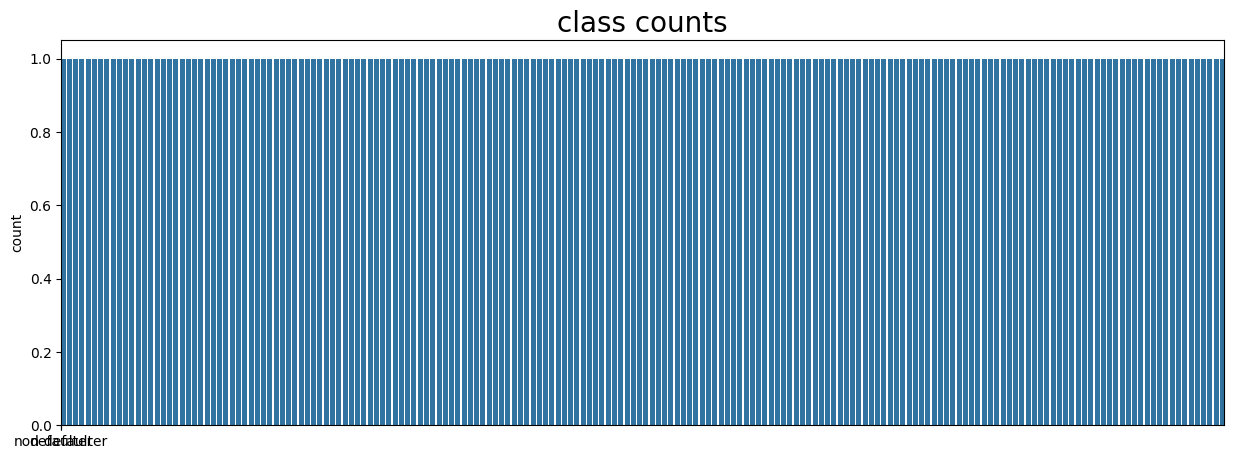

In [103]:
# Getting the number of positive and negative examples.
plt.figure(figsize=(15,5))
sns.countplot(Loan_renamed['target variable'])
plt.xticks((0, 1), ["non-defaulter", "defaulter"])
plt.xlabel("")
plt.ylabel("count")
plt.title("class counts", y=1, fontdict={"fontsize": 20})

print(Loan_renamed['target variable'].value_counts())

<Axes: title={'center': 'Loan Amount (Box Plot)'}, xlabel='Employment type', ylabel='Loan Amount'>

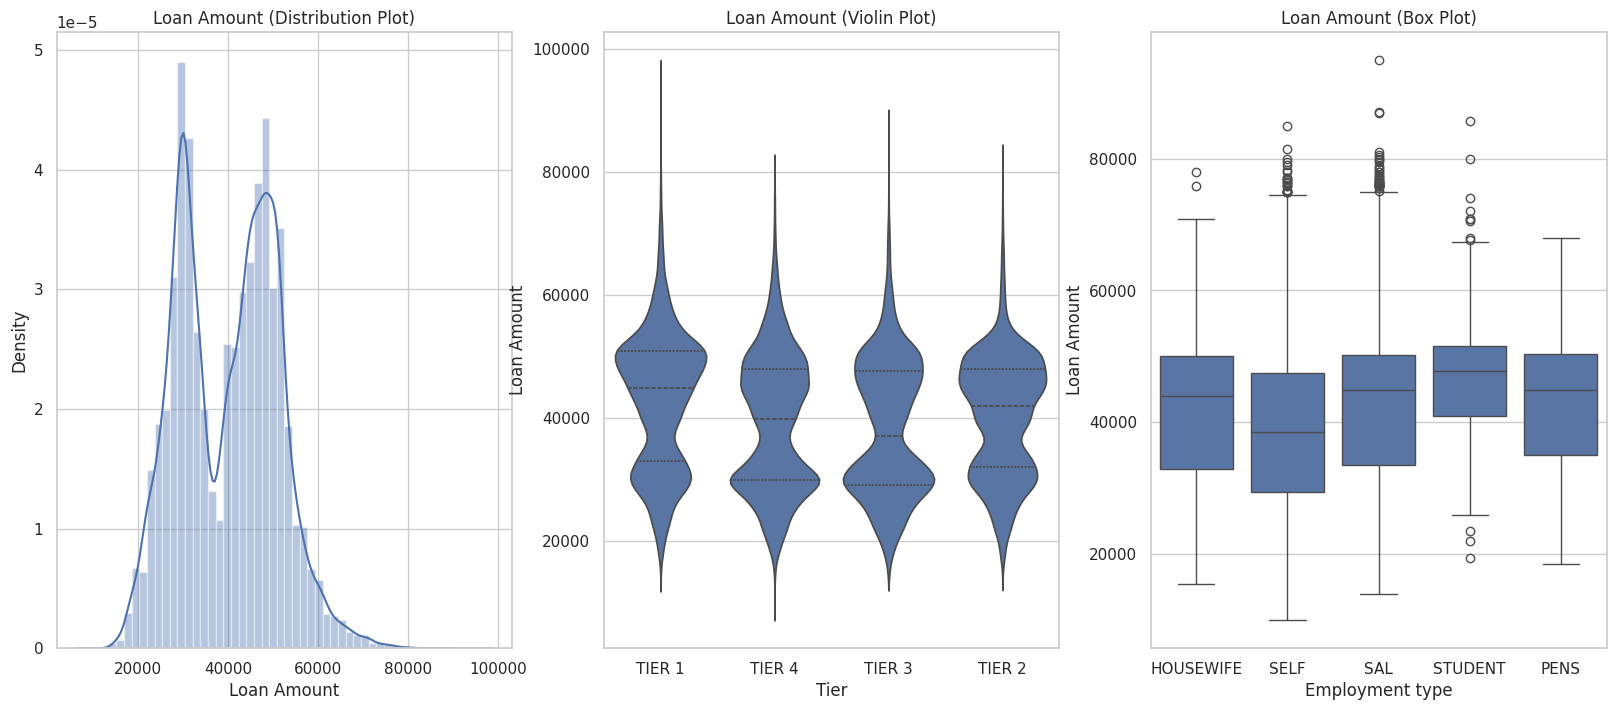

In [ ]:
sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("loan amount (distribution plot)")
sns.distplot(Loan_renamed['loan amount'],ax=ax[0])
ax[1].set_title("loan amount (violin Plot)")
sns.violinplot(data =Loan_renamed, x='Tier',y='loan amount',ax=ax[1], inner="quartile")
ax[2].set_title("loan amount (Box Plot)")
sns.boxplot(data =Loan_renamed, x='employment type',y='loan amount',ax=ax[2],orient='v')

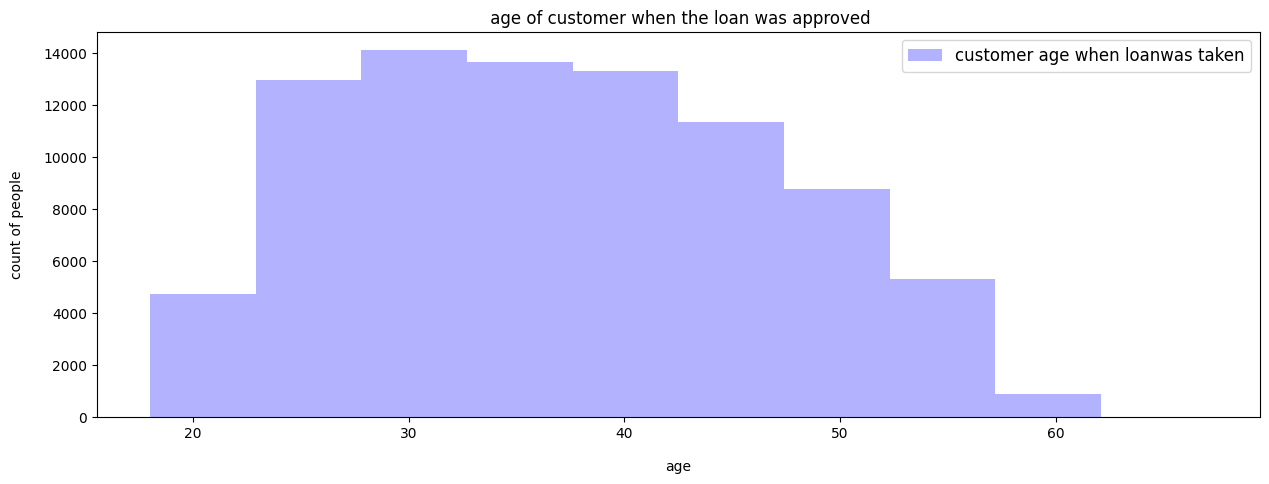

In [209]:
##Age- age at which the client took the loan
plt.figure(figsize=(15,5))

#bar plot
Loan_renamed['customer age when loanwas taken'].plot(kind='hist',color='b',alpha=0.3, edgecolor='none')
plt.xlabel("age", labelpad=14)
plt.ylabel("count of people", labelpad=14)
plt.title(" age of customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

<Axes: xlabel='Customer age when loanwas taken', ylabel='Loan Amount'>

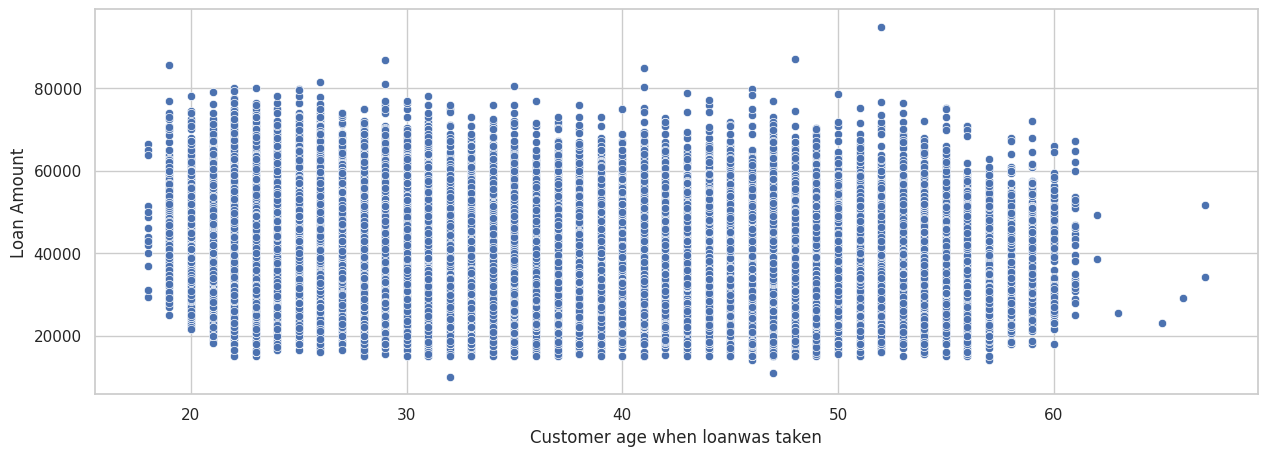

In [ ]:
# Explore correlation between age and loan amount
plt.figure(figsize=(15,5))
sns.scatterplot(x=Loan_renamed['Customer age when loanwas taken'],y='Loan Amount',data=Loan_renamed)

In [ ]:
# gender = pd.get_dummies(Loan_renamed['Gender'])
# Loan_renamed=pd.concat([Loan_renamed,gender], axis=1)
# Loan_renamed = Loan_renamed.drop('Gender', axis=1)

# Encoding categorical variables

In [210]:
categorical_features.info()
categorical_features.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   product code of two wheeler  119528 non-null  object
 1   gender                       119528 non-null  object
 2   employment type              119528 non-null  object
 3   resident type of customer    119528 non-null  object
 4   tier                         119528 non-null  object
dtypes: object(5)
memory usage: 4.6+ MB


,product code of two wheeler,gender,employment type,resident type of customer,tier
0,SC,FEMALE,HOUSEWIFE,OWNED,TIER 1
1,MO,MALE,SELF,RENT,TIER 1
2,SC,MALE,SELF,RENT,TIER 1
3,SC,FEMALE,SAL,RENT,TIER 1
4,MC,MALE,SAL,RENT,TIER 1


In [144]:
categorical_features.head(5)

,product code of two wheeler,gender,employment type,resident type of customer,tier
0,SC,FEMALE,HOUSEWIFE,OWNED,TIER 1
1,MO,MALE,SELF,RENT,TIER 1
2,SC,MALE,SELF,RENT,TIER 1
3,SC,FEMALE,SAL,RENT,TIER 1
4,MC,MALE,SAL,RENT,TIER 1


In [223]:
#from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
#encoder = OneHotEncoder()

# Fit and transform the categorical features
#encoded_features = encoder.fit_transform(categorical_features)
#print(encoded_features)
#encoded_features
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

# Create a ColumnTransformer to handle both numerical and categorical variables
#numeric_transformer = 'passthrough'
#categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine the transformers and apply them to the dataset
#full_transformer = ColumnTransformer(transformers=[
   # ('numeric', numeric_transformer, numerical),
   # ('categorical', categorical_transformer, categorical_features)
#], remainder='passthrough')


# Encode categorical features using one-hot encoding
encoded_data = pd.get_dummies(Loan_renamed, columns=["product code of two wheeler", "gender", "employment type", "resident type of customer", "tier"], drop_first=True)
#numerical = list(set(Loan_renamed.columns) - set(categorical_features))
# Concatenate the encoded features with the numerical features
merged= pd.concat([Loan_renamed, encoded_data], axis="columns")



In [224]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 65 columns):
 #   Column                                                          Non-Null Count   Dtype         
---  ------                                                          --------------   -----         
 0   customer id                                                     119528 non-null  int64         
 1   customer has bounced in first emi                               119528 non-null  int64         
 2   no of times bounced 12 months                                   119528 non-null  int64         
 3   maximum mob                                                     85048 non-null   float64       
 4   no of times bounced while repaying the loan                     85048 non-null   float64       
 5   emi                                                             85048 non-null   float64       
 6   loan amount                                                     85048 non-nu

# Class Imbalance

In [213]:
#Split into X and Y
X=Loan_renamed.drop(['customer id','target variable'],axis=1)
Y=Loan_renamed[["target variable"]]

In [214]:
#Scale the dataset
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])

# Replace the original numerical features with the scaled versions
X = pd.concat([X_scaled, X.select_dtypes(exclude=['int64', 'float64'])], axis=1)

In [215]:
# Principle Component Analysis to figure out the most important features
#from sklearn.decomposition import PCA

# Create the PCA object and set the number of components to retain 95% of the variance
#pca = PCA(n_components=0.95)

# Fit the PCA model to the data
#pca.fit(X)

# Get the number of principal components that retain 95% of the variance
#n_components = pca.n_components_
#print(f"Number of principal components that retain 95% of the variance: {n_components}")

# Transform the data using the PCA model
#X_pca = pca.transform(X)


ValueError: could not convert string to float: 'SC'

# Create Machine Learning Models

In [216]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_score = lr_model.score(X_test, Y_test)
print("Logistic Regression score:", lr_score)

# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, Y_train)
svm_score = svm_model.score(X_test, Y_test)
print("SVM score:", svm_score)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_score = dt_model.score(X_test, Y_test)
print("Decision Trees score:", dt_score)

# Random Forests
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_score = rf_model.score(X_test, Y_test)
print("Random Forests score:", rf_score)

# Gradient Boosting Machines (GBM)
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, Y_train)
gbm_score = gbm_model.score(X_test, Y_test)
print("Gradient Boosting Machines score:", gbm_score)

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_score = knn_model.score(X_test, Y_test)
print("K-Nearest Neighbors score:", knn_score)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_score = nb_model.score(X_test, Y_test)
print("Naive Bayes score:", nb_score)


ValueError: could not convert string to float: 'SC'